<a href="https://colab.research.google.com/github/surendiran-20cl/House-Sales-Price-Prediction-Advanced-Regression-Techniques/blob/main/House_Sales_Prices_Prediction_Advanced_Regression_Techniques_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

house_prices_advanced_regression_techniques_path = kagglehub.competition_download('house-prices-advanced-regression-techniques')

print('Data source import complete.')


100%|██████████| 199k/199k [00:00<00:00, 667kB/s]

Extracting files...
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

# Load the datasets
train = pd.read_csv("/content/drive/MyDrive/Intellipaat Colab Files/AI Course/House Price Prediction/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Intellipaat Colab Files/AI Course/House Price Prediction/test.csv")

# Show the shapes and first few rows
train_shape = train.shape
test_shape = test.shape
train_head = train.head()
test_head = test.head()

train_shape, test_shape, train_head, test_head


((1460, 81),
 (1459, 80),
    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
 0   1          60       RL         65.0     8450   Pave   NaN      Reg   
 1   2          20       RL         80.0     9600   Pave   NaN      Reg   
 2   3          60       RL         68.0    11250   Pave   NaN      IR1   
 3   4          70       RL         60.0     9550   Pave   NaN      IR1   
 4   5          60       RL         84.0    14260   Pave   NaN      IR1   
 
   LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
 0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
 1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
 2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
 3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
 4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   
 
   YrSold  SaleType  SaleCon

train.csv: 1460 rows × 81 columns (including SalePrice, the target).

test.csv: 1459 rows × 80 columns (missing the SalePrice column, as expected).

Each row represents a house, with rich features about its physical attributes, neighborhood, utilities, and condition.

# Step 1: Exploratory Data Analysis (EDA)

In [ ]:
# ================================================
# Housing Price Prediction - Exploratory Data Analysis
# ================================================

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for better readability
pd.set_option('display.max_columns', 100)
sns.set(style="whitegrid")


In [ ]:
# ----------------------------------------
# 1. Load the datasets
# ----------------------------------------
train = pd.read_csv("/content/drive/MyDrive/Intellipaat Colab Files/AI Course/House Price Prediction/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Intellipaat Colab Files/AI Course/House Price Prediction/test.csv")

# Display the shape (rows, columns) of both datasets
print(f"Train shape: {train.shape}")
print(f"Test shape:  {test.shape}")

# Preview the first few rows of the training data
train.head()


Train shape: (1460, 81)
Test shape:  (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Data Overview & Missing Values:

In [ ]:
# ----------------------------------------
# 2. Basic info and data types
# ----------------------------------------

# Check the data types and non-null counts
print("Training Data Info:\n")
train.info()

# Describe numerical features to understand their distributions
train.describe()

Training Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# ----------------------------------------
# 3. Check for missing values
# ----------------------------------------

# Calculate missing values count and percentage for each column
missing_values = train.isnull().sum()
missing_percent = 100 * missing_values / len(train)
missing_data = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing %': missing_percent
})

# Filter only columns with missing values and sort descending
missing_data = missing_data[missing_data['Missing Count'] > 0].sort_values(by='Missing %', ascending=False)

# Display missing values summary
print("Columns with Missing Values:\n")
print(missing_data)


Columns with Missing Values:

              Missing Count  Missing %
PoolQC                 1453  99.520548
MiscFeature            1406  96.301370
Alley                  1369  93.767123
Fence                  1179  80.753425
MasVnrType              872  59.726027
FireplaceQu             690  47.260274
LotFrontage             259  17.739726
GarageType               81   5.547945
GarageYrBlt              81   5.547945
GarageFinish             81   5.547945
GarageQual               81   5.547945
GarageCond               81   5.547945
BsmtExposure             38   2.602740
BsmtFinType2             38   2.602740
BsmtQual                 37   2.534247
BsmtCond                 37   2.534247
BsmtFinType1             37   2.534247
MasVnrArea                8   0.547945
Electrical                1   0.068493


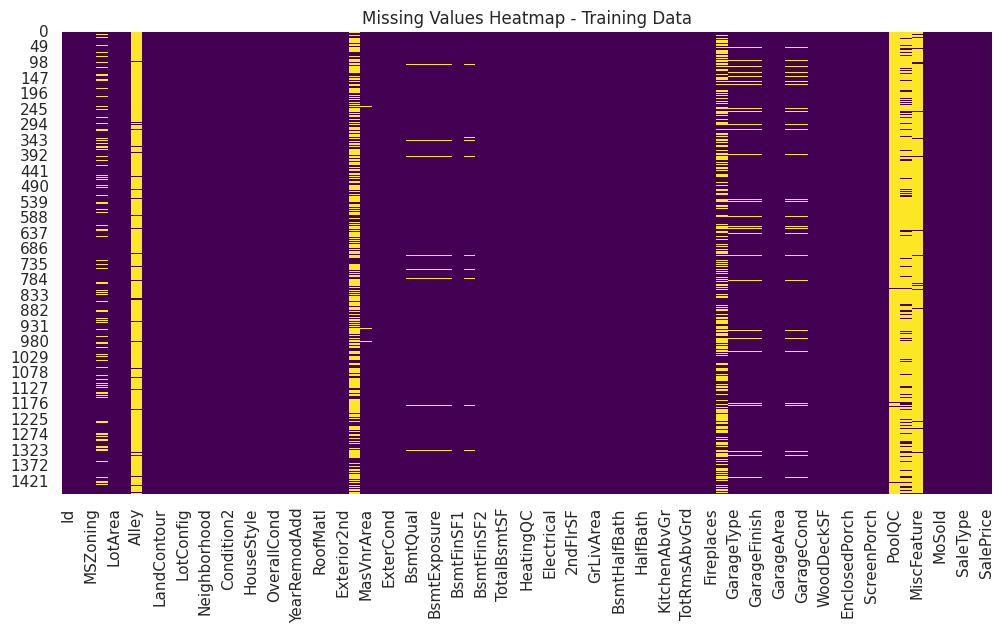

In [ ]:
#  Visualize missing data
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap - Training Data")
plt.show()

Correlation & Target Variable:


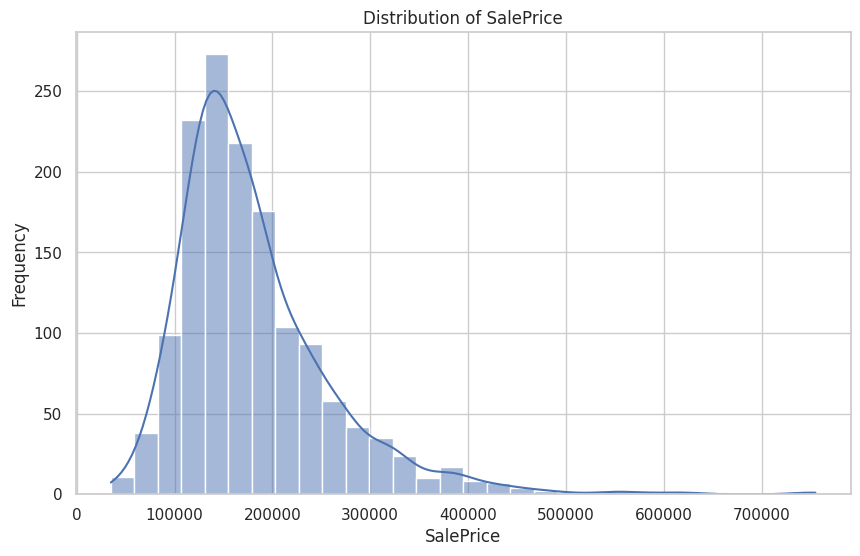

In [ ]:
# ----------------------------------------
# 4. Target Variable - 'SalePrice'
# ----------------------------------------

# Plot the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(train['SalePrice'], kde=True, bins=30)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

# Log-transform target if it is skewed (we'll check later during modeling)



In [ ]:
# ----------------------------------------
# 5. Correlation Heatmap (Numerical Features)
# ----------------------------------------

# Compute correlation with SalePrice
correlation_matrix = train.corr(numeric_only=True)

# Sort features with highest correlation to SalePrice
top_corr_features = correlation_matrix['SalePrice'].sort_values(ascending=False)[1:11]

print("Top 10 features most correlated with SalePrice:")
print(top_corr_features)



Top 10 features most correlated with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


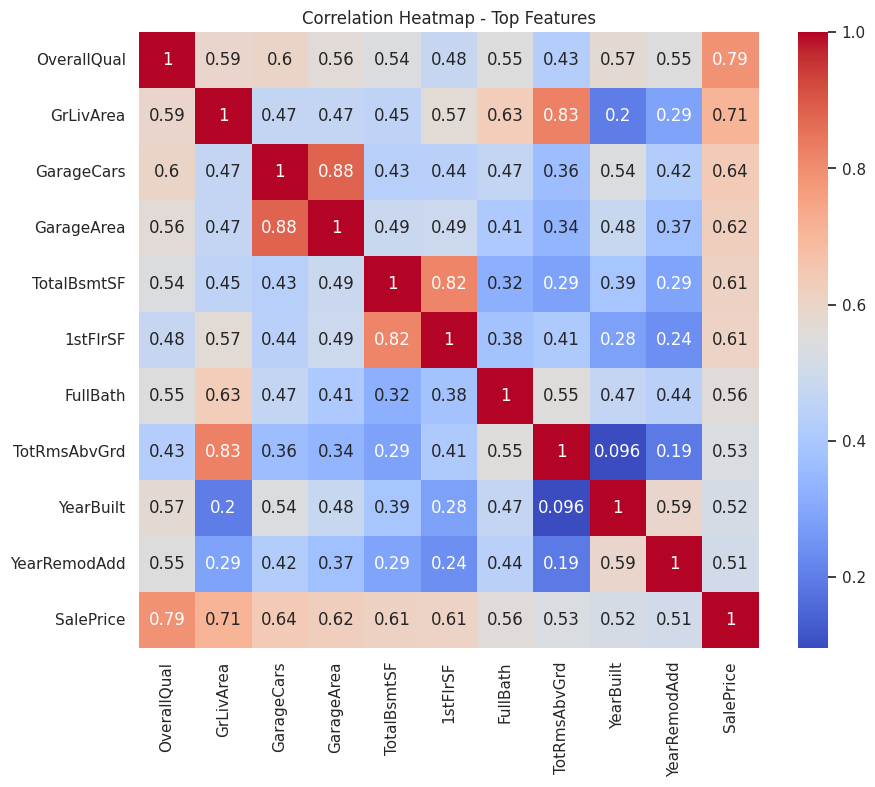

In [ ]:
# Plot heatmap of top correlated features
plt.figure(figsize=(10, 8))
sns.heatmap(train[top_corr_features.index.tolist() + ['SalePrice']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap - Top Features")
plt.show()

# Step 2: Data Preprocessing & Feature Engineering

This is where we:

- Handle missing values

- Convert categorical variables into numeric ones (encoding)

- Combine train and test data for consistent processing

- Create new features (optional for now)

In [3]:
# ================================================
# Data Preprocessing & Feature Engineering
# ================================================

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Copy the original datasets to avoid modifying them directly
train_data = train.copy()
test_data = test.copy()

# Save the target variable and drop it temporarily
y = train_data['SalePrice']
train_data.drop(['SalePrice'], axis=1, inplace=True)

# Combine train and test for consistent preprocessing
combined = pd.concat([train_data, test_data], axis=0, ignore_index=True)

print(f"Combined shape (Train + Test): {combined.shape}")


Combined shape (Train + Test): (2919, 80)


Step-by-Step Pre-processing:

In [4]:

# ----------------------------------------
# 1. Drop columns with too many missing values
# ----------------------------------------
missing_thresh = 0.9  # Drop columns with more than 90% missing
missing_percent = combined.isnull().mean()
cols_to_drop = missing_percent[missing_percent > missing_thresh].index.tolist()

print(f"Dropping columns (too many missing values): {cols_to_drop}")
combined.drop(columns=cols_to_drop, axis=1, inplace=True)


Dropping columns (too many missing values): ['Alley', 'PoolQC', 'MiscFeature']


Handle Missing Values (Numerical + Categorical):



In [5]:
# Separate columns by type
num_cols = combined.select_dtypes(include=['int64', 'float64']).columns
cat_cols = combined.select_dtypes(include=['object']).columns

# Impute numerical columns with median
num_imputer = SimpleImputer(strategy='median')
combined[num_cols] = num_imputer.fit_transform(combined[num_cols])

# Impute categorical columns with most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
combined[cat_cols] = cat_imputer.fit_transform(combined[cat_cols])


Encode Categorical Variables:

We'll use Label Encoding for simplicity — you can switch to One-Hot Encoding later if needed.

In [6]:
# Encode all categorical variables using Label Encoding
label_encoder = LabelEncoder()

for col in cat_cols:
    combined[col] = label_encoder.fit_transform(combined[col])

print("Encoding complete. All features are now numeric.")


Encoding complete. All features are now numeric.


 Final step: Split the combined data back

In [7]:
# Split combined data back into train and test
X = combined.iloc[:len(train_data), :]
X_test = combined.iloc[len(train_data):, :]

#  Drop Id column (not a feature)
X = X.drop(columns=['Id'], errors='ignore')
X_test = X_test.drop(columns=['Id'], errors='ignore')

print(f"Final training features shape: {X.shape}")
print(f"Final test features shape:     {X_test.shape}")



Final training features shape: (1460, 76)
Final test features shape:     (1459, 76)


# Step 3: Modeling and Evaluation
We'll train several models and evaluate their performance using cross-validation.

We'll start simple and ramp up:

- Linear Regression (baseline)

- Random Forest Regressor

- XGBoost Regressor (usually best for this task)

We'll use Root Mean Squared Log Error (RMSLE) since that’s commonly used in house price prediction.



Set Up Cross-Validation and RMSLE Scorer:

In [10]:
# ================================================
# Model Training and Evaluation
# ================================================
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Define RMSLE (Root Mean Squared Log Error) scorer
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

# Utility function to evaluate model
def evaluate_model(model, X, y):
    scores = cross_val_score(model, X, y, cv=5, scoring=rmsle_scorer)
    print(f"{model.__class__.__name__} RMSLE (CV): {-scores.mean():.5f}")
    return scores


## 1. Linear Regression (Baseline)

In [11]:
# -----------------------------
# Linear Regression (Baseline)
# -----------------------------
lr = LinearRegression()
evaluate_model(lr, X, y)


LinearRegression RMSLE (CV): 0.17192


array([-0.17554047, -0.17332656, -0.16798564, -0.16711054, -0.17565728])

## 2. Random Forest Regressor

In [ ]:
# -----------------------------
# Random Forest Regressor
# -----------------------------
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
evaluate_model(rf, X, y)


RandomForestRegressor RMSLE (CV): 0.14522


array([-0.13868474, -0.15272069, -0.14201437, -0.1374834 , -0.15518283])

## 3. XGBoost Regressor (Best Performer)


In [12]:
# -----------------------------
# XGBoost Regressor
# -----------------------------
xgb_model = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

evaluate_model(xgb_model, X, y)


XGBRegressor RMSLE (CV): 0.12354


array([-0.10838198, -0.13918692, -0.13123585, -0.11191197, -0.12696473])

Train Final Model and Predict on Test Set:

Let’s pick the best model (say XGBoost) and train it fully:

In [13]:
# Fit on full training data
xgb_model.fit(X, y)

# Predict on test set
predictions = xgb_model.predict(X_test)

# Clip predictions to avoid negative prices
predictions = np.maximum(0, predictions)


# Step 4: Prepare Submission

In [14]:
# Load sample submission to match format
sample_submission = pd.read_csv("/content/drive/MyDrive/Intellipaat Colab Files/AI Course/House Price Prediction/sample_submission.csv")

# Add predictions
sample_submission['SalePrice'] = predictions

# Save to CSV
sample_submission.to_csv("submission.csv", index=False)

print("Submission file 'submission.csv' created!")


Submission file 'submission.csv' created!


# Step 5:  LHyperparameter Tuning (XGBoost)

We’ll use RandomizedSearchCV for faster tuning.

In [15]:
from sklearn.model_selection import RandomizedSearchCV

# Parameter grid for tuning
param_grid = {
    'n_estimators': [100, 300, 500, 1000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Create the model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)

# Randomized Search CV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=30,
    cv=5,
    scoring=rmsle_scorer,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit search
random_search.fit(X, y)

# Best parameters
print("🔍 Best Parameters Found:")
print(random_search.best_params_)

# Best model
best_model = random_search.best_estimator_


Fitting 5 folds for each of 30 candidates, totalling 150 fits
🔍 Best Parameters Found:
{'subsample': 0.8, 'n_estimators': 1000, 'max_depth': 4, 'learning_rate': 0.05, 'colsample_bytree': 0.6}


# Step 6:  Evaluate the Tuned Model

In [16]:
# Cross-validation RMSLE
evaluate_model(best_model, X, y)

# Train on full data
best_model.fit(X, y)

# Predict on test set
final_preds = np.maximum(0, best_model.predict(X_test))


XGBRegressor RMSLE (CV): 0.12265


#  Feature Importance (Top 20)

<ipython-input-18-2bff0731d5be>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='Blues_d')


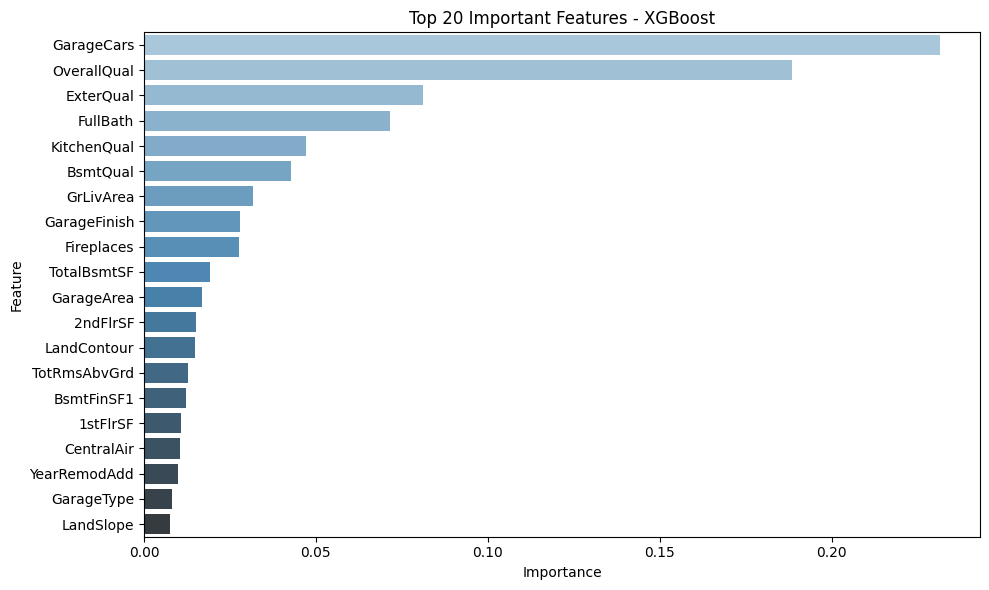

In [18]:
# Plot feature importances
import matplotlib.pyplot as plt
import seaborn as sns
importances = best_model.feature_importances_
features = X.columns

# Create a dataframe
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(20)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='Blues_d')
plt.title("Top 20 Important Features - XGBoost")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


# Prepare Submission

In [19]:
# Create submission
sample_submission['SalePrice'] = final_preds
sample_submission.to_csv("submission_tuned.csv", index=False)
print(" Tuned model predictions saved as 'submission_tuned.csv'")


 Tuned model predictions saved as 'submission_tuned.csv'


# Why Log-Transform the Target?
SalePrice is right-skewed (a few very high prices pull the mean).

Log-transforming makes it more normal — improving performance and reducing RMSLE.

 Step 1: Log-Transform SalePrice (Training)

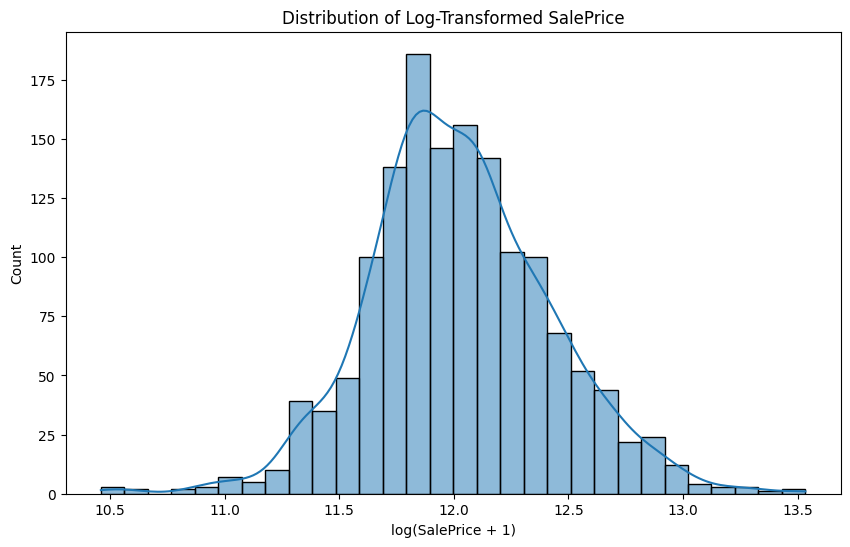

In [20]:
# Log-transform the target variable
y_log = np.log1p(y)  # log(1 + SalePrice) to handle zero prices

# Sanity check on distribution
plt.figure(figsize=(10, 6))
sns.histplot(y_log, bins=30, kde=True)
plt.title("Distribution of Log-Transformed SalePrice")
plt.xlabel("log(SalePrice + 1)")
plt.show()


 Re-train Models with y_log
- Re-train XGBoost (best_model)

In [21]:
# Re-fit best XGBoost model with log target
best_model.fit(X, y_log)

# Predict on test and inverse the log
xgb_preds_log = best_model.predict(X_test)
xgb_preds = np.expm1(xgb_preds_log)  # reverse log1p


- Re-train Random Forest for ensembling


In [22]:
# Re-fit Random Forest on log target
rf_model = RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1)
rf_model.fit(X, y_log)

# Predict and inverse transform
rf_preds_log = rf_model.predict(X_test)
rf_preds = np.expm1(rf_preds_log)


 Step 2: Ensembling (Simple Averaging):

You can ensemble by averaging predictions from XGBoost + Random Forest:

In [23]:
# Simple average of both models' predictions
final_ensemble_preds = (xgb_preds + rf_preds) / 2


In [25]:
# Create Submission from Ensemble

# Load sample submission again to align IDs
sample_submission = pd.read_csv("/content/drive/MyDrive/Intellipaat Colab Files/AI Course/House Price Prediction/sample_submission.csv")
sample_submission['SalePrice'] = final_ensemble_preds

# Save submission
sample_submission.to_csv("submission_ensemble.csv", index=False)
print(" Ensemble submission saved as 'submission_ensemble.csv'")


 Ensemble submission saved as 'submission_ensemble.csv'


In [26]:
# save your trained ensemble model or just the best one (e.g., XGBoost):
import pickle

# Save XGBoost model (log-transformed trained)
with open("xgb_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

# Optionally: Save Random Forest too
with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)


In [ ]:
#Build Gradio app

#Let’s say you want to predict house price using your XGBoost model:

In [27]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.6/322.6 kB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 119.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.7 MB/s eta 0:00:00


In [28]:
import gradio as gr
import numpy as np
import pickle

# Load saved model
with open("xgb_model.pkl", "rb") as f:
    model = pickle.load(f)

# Example feature list (replace with actual feature names and order)
feature_names = X.columns.tolist()

# Define prediction function
def predict_price(*inputs):
    input_array = np.array(inputs).reshape(1, -1)
    log_price = model.predict(input_array)
    price = np.expm1(log_price)  # reverse log transform
    return round(price[0], 2)

# Build input interface
inputs = [gr.Number(label=feature) for feature in feature_names[:10]]  # For demo, limit to 10
gr.Dropdown(choices=["Gtl", "Mod", "Sev"], label="LandSlope")


output = gr.Number(label="Predicted Sale Price")

# Launch the app
gr.Interface(fn=predict_price, inputs=inputs, outputs=output, title="🏠 House Price Predictor").launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f0d2d594dc94a25d5e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Pick an Existing Row from Train/Test

This is easier and guarantees correct input format:

In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(['Gtl', 'Mod', 'Sev'])
print(dict(zip(le.classes_, le.transform(le.classes_))))


{np.str_('Gtl'): np.int64(0), np.str_('Mod'): np.int64(1), np.str_('Sev'): np.int64(2)}


In [31]:
import gradio as gr
import numpy as np
import pickle

# Load saved model
with open("xgb_model.pkl", "rb") as f:
    model = pickle.load(f)

# Example feature list (replace with actual feature names and order)
feature_names = X.columns.tolist()

# Define prediction function
def predict_price(*inputs):
    input_array = np.array(inputs).reshape(1, -1)
    log_price = model.predict(input_array)
    price = np.expm1(log_price)  # reverse log transform
    return round(price[0], 2)

# Build input interface
inputs = [gr.Number(label=feature) for feature in feature_names[:10]]  # For demo, limit to 10
gr.Dropdown(choices=["Gtl", "Mod", "Sev"], label="LandSlope")


output = gr.Number(label="Predicted Sale Price")

# Launch the app
gr.Interface(fn=predict_price, inputs=inputs, outputs=output, title="🏠 House Price Predictor").launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://954a91c7db6957eba3.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [29]:
# Pick any row from the dataset
sample_input = X.iloc[0]  # change the index to try other rows

# Convert to array and predict
sample_array = sample_input.values.reshape(1, -1)
log_pred = best_model.predict(sample_array)
price_pred = np.expm1(log_pred)

print(f"Predicted SalePrice: ${price_pred[0]:,.2f}")


Predicted SalePrice: $205,907.77
